In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
Y_samples = []
dY_samples = []

system = 'Lorenz63'
filter_method = 'tikhonov_hp'

sigma = 0.1
noise_lvl = str(sigma)

#Load true dynamical system data
filepath_xt = 'data_files/' + system + '_dynamics.csv'
dynamics = np.genfromtxt(filepath_xt, delimiter=',')

t = dynamics[0]
data = dynamics[1:]
t_samples = len(t)
trim = int(np.floor(5 / 100 * t_samples))

n_states = int(data.shape[0] / 2)
X = data[0:n_states,trim:-trim]
dX = data[n_states:,trim:-trim]
tt = t[trim:-trim]

#Load sample observations
for state in range(n_states):
    
    if filter_method in ['trendfilter', 'ssplines', 'tikhonov_hp']:
        filepath_y = 'data_files/' + filter_method + '/' + system + '_' + filter_method + '_' + noise_lvl + '_Y' + str(state+1) + '.csv'
        y = np.genfromtxt(filepath_y, delimiter=',')
        Y_samples.append(y)
        
    filepath_dy = 'data_files/' + filter_method+ '/' + system + '_' + filter_method + '_' + noise_lvl + '_dY' + str(state+1) + '.csv'
    dy = np.genfromtxt(filepath_dy, delimiter=',')
    dY_samples.append(dy)

n_samples = dY_samples[0].shape[0]

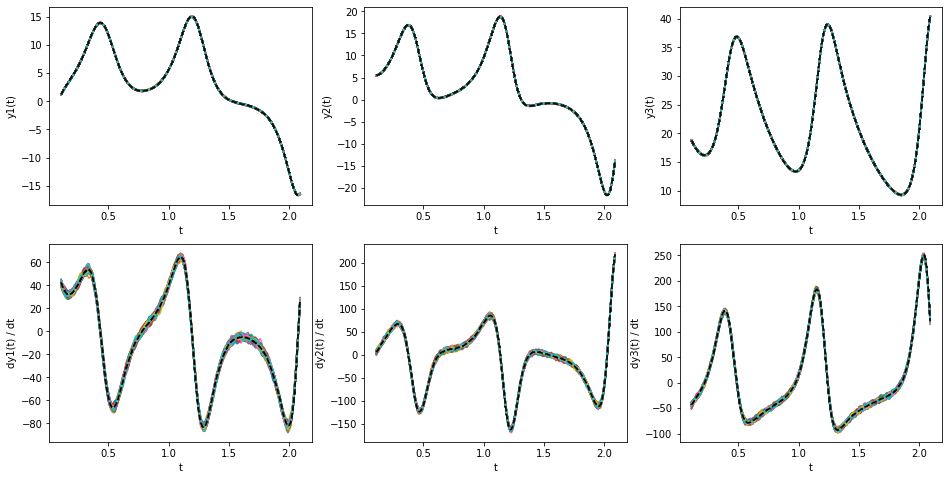

In [7]:
#check samples by plotting results

if filter_method in ['trendfilter', 'ssplines', 'tikhonov_hp']:
    
    fig, axs = plt.subplots(2,n_states, figsize = (16,8))
    for sample in range(n_samples):

        for state in range(n_states):

            axs[0,state].plot(tt, Y_samples[state][sample,:])
            axs[0,state].plot(tt, X[state,:],'k--')
            axs[0,state].set_xlabel('t')
            axs[0,state].set_ylabel(f'y{state+1}(t)')

            axs[1,state].plot(tt, dY_samples[state][sample,:])
            axs[1,state].plot(tt, dX[state,:],'k--')
            axs[1,state].set_xlabel('t')
            axs[1,state].set_ylabel(f'dy{state+1}(t) / dt')
else:
    
    fig, axs = plt.subplots(1,n_states, figsize = (16,4))
    for sample in range(n_samples):

        for state in range(n_states):

            axs[state].plot(tt, dY_samples[state][sample,:])
            axs[state].plot(tt, dX[state,:],'k--')
            axs[state].set_xlabel('t')
            axs[state].set_ylabel(f'dy{state+1}(t) / dt')
    
